In [27]:
!pip install tabulate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from tabulate import tabulate


In [28]:
with open('output/gas_price_avg.txt', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data, columns=['Date', 'Average gas price each month'])
df['Average gas price each month'] = df['Average gas price each month'].astype(float).round(2)
df.head()


,Date,Average gas price each month
0,01/2016,5.659627e+10
1,01/2017,2.250757e+10
2,01/2018,5.210606e+10
3,01/2019,1.395446e+10
4,02/2016,6.918068e+10


In [29]:
# Sort by Year and Month
df_sorted = df.sort_values(by="Date", key=lambda x: pd.to_datetime(x, format="%m/%Y"))

# Store the results as CSV (easier to interpret for later reference)
# df_sorted.to_csv("output/gas_used_avg.csv", index=False)

df_sorted.head()


,Date,Average gas price each month
22,08/2015,1.597440e+11
26,09/2015,5.651130e+10
30,10/2015,5.390169e+10
34,11/2015,5.360761e+10
38,12/2015,5.589953e+10


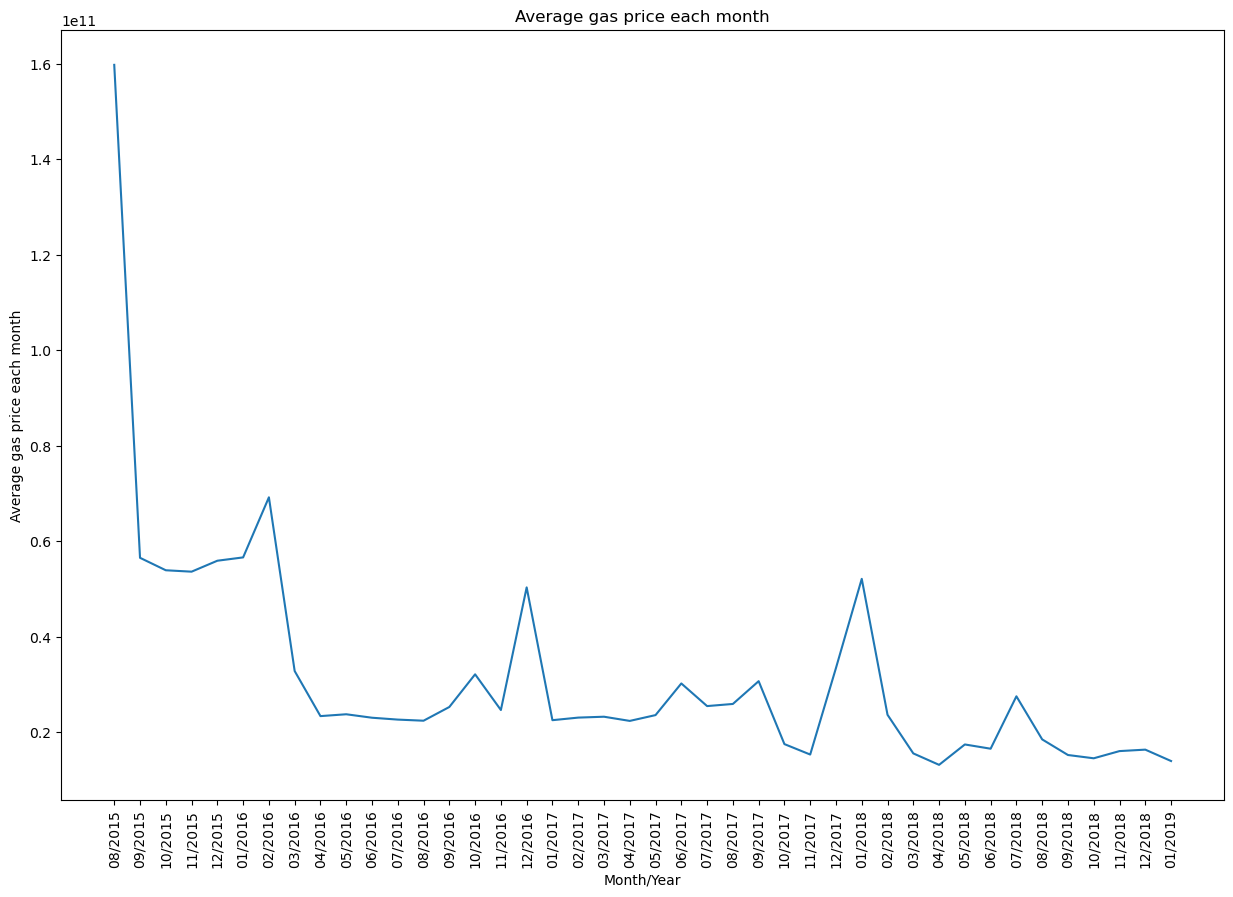

In [30]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(df_sorted["Date"], df_sorted["Average gas price each month"])
ax.set_xlabel("Month/Year")
ax.set_ylabel("Average gas price each month")
ax.set_title("Average gas price each month")
plt.xticks(rotation=90)
plt.savefig('output/gas_price_avg.png',  bbox_inches='tight')
plt.show()


In [31]:
import sys

# Open a file for writing
with open('output/gas_price_avg.md', 'w') as f:
    # Redirect stdout to the file
    sys.stdout = f
    print(tabulate(df_sorted, headers='keys', tablefmt="github", showindex=False))
    
    # Restore stdout to its original value
    sys.stdout = sys.__stdout__
